In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dados = pd.read_csv("/content/drive/MyDrive/IA Generativa/all_ai_tool.csv")

In [32]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4969 entries, 0 to 4968
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   AI Tool Name     4969 non-null   object
 1   Description      4969 non-null   object
 2   Free/Paid/Other  4969 non-null   object
 3   Useable For      4969 non-null   object
 4   Charges          2534 non-null   object
 5   Review           1462 non-null   object
 6   Tool Link        4969 non-null   object
 7   Major Category   4969 non-null   object
dtypes: object(8)
memory usage: 310.7+ KB


In [33]:
# Contagem de ferramentas por categoria
category_count = dados.groupby('Major Category')['AI Tool Name'].count()

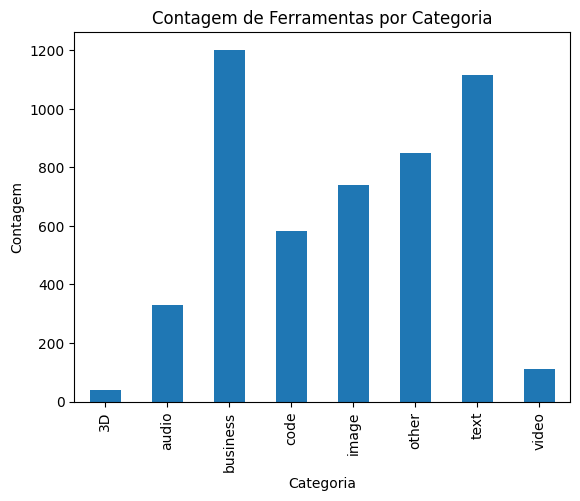

In [34]:
# Gráfico de barras para contagem de categorias
category_count.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.title('Contagem de Ferramentas por Categoria')
plt.show()

In [35]:
#Contagem de ferramentas por modelo de monetização
monetization = dados.groupby('Free/Paid/Other')['AI Tool Name'].count()

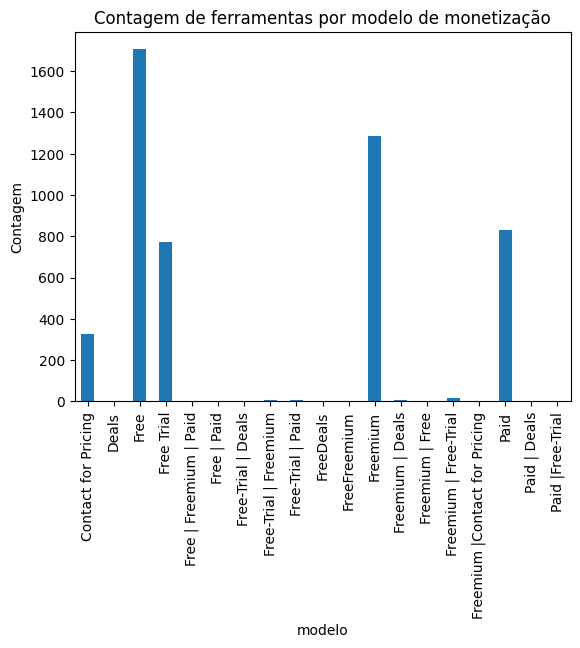

In [36]:
# Gráfico de barras para modelo de monetização
monetization.plot(kind='bar')
plt.xlabel('modelo')
plt.ylabel('Contagem')
plt.title('Contagem de ferramentas por modelo de monetização')
plt.show()

In [37]:
#Quais categorias possuem mais ferramentas pagas
non_free = dados[dados['Free/Paid/Other'] != 'Free']
non_free_categorys = non_free.groupby('Major Category')['AI Tool Name'].count()

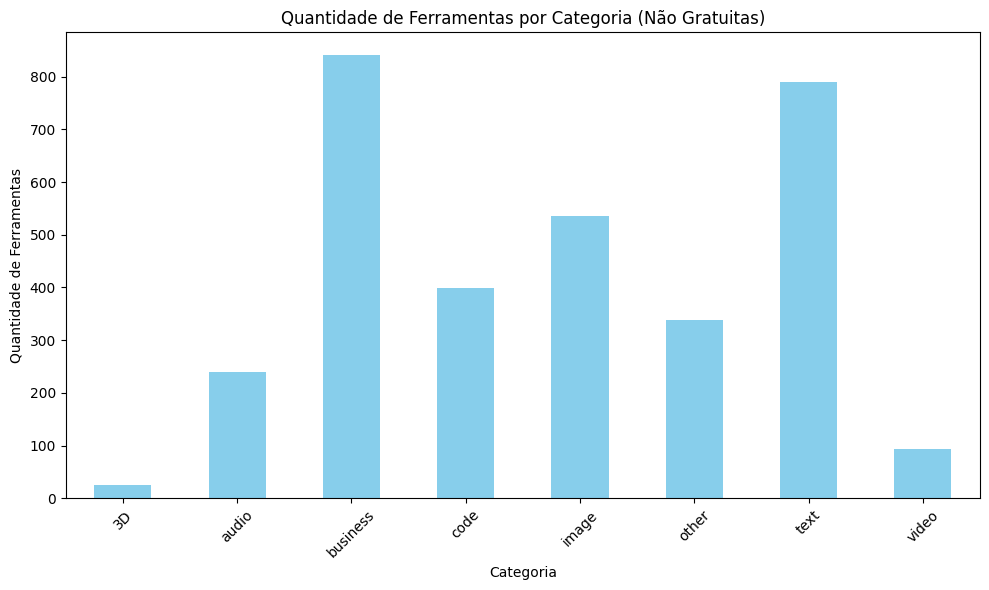

In [38]:
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
non_free_categorys.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Ferramentas')
plt.title('Quantidade de Ferramentas por Categoria (Não Gratuitas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
#Quantidade de ferramentas em que a palavra "GPT" aparece no nome ou na descrição
contains_gpt = (dados['AI Tool Name'].str.contains('GPT', case=False) | dados['Description'].str.contains('GPT', case=False))

total_gpt_tools = contains_gpt.sum()

print('Total de ferramentas com a palavra "GPT": ',total_gpt_tools)

Total de ferramentas com a palavra "GPT":  447


In [40]:
#Quantidade de ferramentas em que a palavra "Generative" aparece no nome ou na descrição
contains_gen = (dados['AI Tool Name'].str.contains('generative', case=False) | dados['Description'].str.contains('generative', case=False))

total_gen_tools = contains_gen.sum()

print('Total de ferramentas com a palavra "generative": ',total_gen_tools)

Total de ferramentas com a palavra "generative":  63


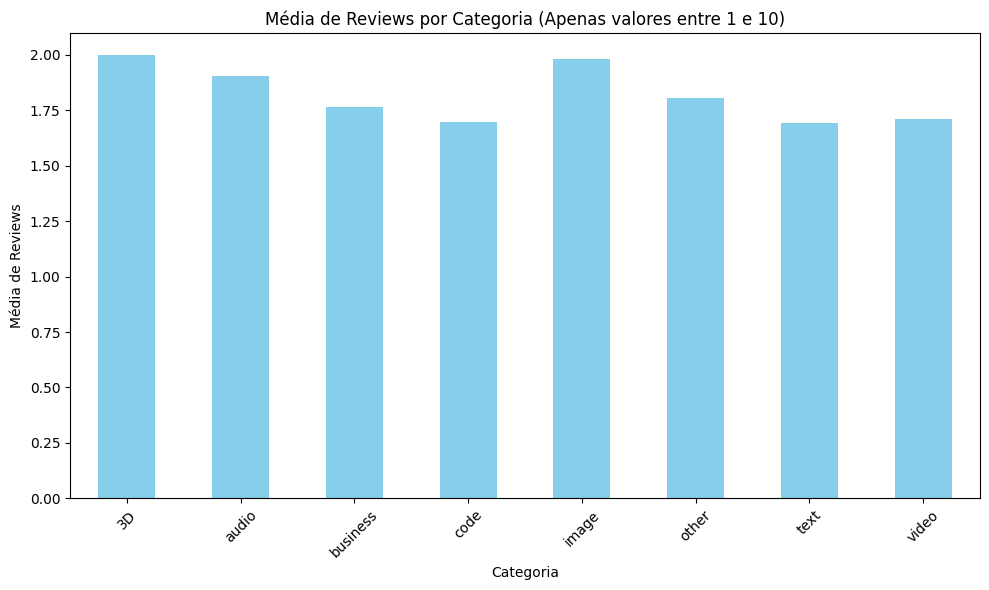

In [42]:
#Media dos reviews por categoria
dados['Review'] = pd.to_numeric(dados['Review'], errors='coerce')  # 'coerce' irá converter não numéricos para NaN

dados_filtrados = dados[(dados['Review'] >= 1) & (dados['Review'] <= 10)]

media_reviews_por_categoria = dados_filtrados.groupby('Major Category')['Review'].mean()

plt.figure(figsize=(10, 6))
media_reviews_por_categoria.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Média de Reviews')
plt.title('Média de Reviews por Categoria (Apenas valores entre 1 e 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
#Ferramenta ligada a GPT ou Generative que possui a maior nota
dados['Review'] = pd.to_numeric(dados['Review'], errors='coerce')  # 'coerce' irá converter não numéricos para NaN


dados_filtrados = dados[(dados['Review'] >= 1) & (dados['Review'] <= 10)]

filtro_gpt_generative = dados_filtrados['AI Tool Name'].str.contains('gpt', case=False) | dados_filtrados['Description'].str.contains('gpt', case=False) | dados_filtrados['AI Tool Name'].str.contains('generative', case=False) | dados_filtrados['Description'].str.contains('generative', case=False)

dados_filtrados_gpt_generative = dados_filtrados[filtro_gpt_generative]

ferramenta_com_maior_nota = dados_filtrados_gpt_generative.loc[dados_filtrados_gpt_generative['Review'].idxmax()]

print('A ferramenta com maior nota é: ',ferramenta_com_maior_nota["AI Tool Name"])
print('A nota é: ',ferramenta_com_maior_nota["Review"])

A ferramenta com maior nota é:  Chatgpt
A nota é:  10.0
